In [1]:
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
predictions_loc = 'D:/canopy_data/analysis/CB_ISL_Full_Predict_05242021.geojson'

gdf = gpd.read_file(predictions_loc)

In [3]:
gdf.head()

,geometry
0,"POLYGON ((25.28119 -3.40557, 25.28983 -3.40798..."
1,"POLYGON ((25.25050 -3.41571, 25.25913 -3.41812..."
2,"POLYGON ((25.25711 -3.15636, 25.26571 -3.15876..."
3,"POLYGON ((25.22033 -3.15541, 25.22893 -3.15781..."
4,"POLYGON ((25.26411 -2.99855, 25.27274 -3.00096..."


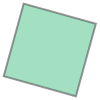

In [4]:
poly1 = gdf.loc[0, 'geometry']

poly1

In [5]:
type(poly1)

shapely.geometry.polygon.Polygon

In [6]:
poly2 = gdf.loc[1, 'geometry']

In [7]:
poly1.exterior.distance(poly2.exterior)

0.02004283895346015

In [8]:
gdf2 = gdf.to_crs('EPSG:3857')

In [11]:
gdf2.head()

,geometry
0,"POLYGON ((2814289.730 -379330.113, 2815251.179..."
1,"POLYGON ((2810872.469 -380461.015, 2811833.944..."
2,"POLYGON ((2811608.679 -351542.726, 2812566.029..."
3,"POLYGON ((2807513.991 -351436.033, 2808471.161..."
4,"POLYGON ((2812387.356 -333949.423, 2813349.103..."


In [12]:
gdf2.loc[0, 'geometry'].exterior.distance(gdf2.loc[1, 'geometry'].exterior)

2231.306021146834

In [17]:
len(gdf2)

132069

In [19]:
i = 0
j = 1
while True:
    print(f'i: {i}; j: {j}', end='\r', flush=True)
    poly1 = gdf2.loc[i, 'geometry']
    poly2 = gdf2.loc[j, 'geometry']
    if poly1.intersects(poly2):
        print('intersection found')
        break
    else:
        i += 1
        j += 1

intersection found


In [20]:
i

9

In [21]:
j

10

In [22]:
poly1 = gdf2.loc[9, 'geometry']
poly2 = gdf2.loc[10, 'geometry']

In [23]:
poly1.intersects(poly2)

True

In [25]:
poly1.exterior.distance(poly2.exterior)

0.0

In [26]:
for i in range(10):
    print('i:', i)
    for j in range(10):
        print('j:', j)
        if j == 2:
            break
    if i == 3:
        break

i: 0
j: 0
j: 1
j: 2
i: 1
j: 0
j: 1
j: 2
i: 2
j: 0
j: 1
j: 2
i: 3
j: 0
j: 1
j: 2


In [33]:
def find_orphans(gdf, geom_column='geometry', max_distance=1000):
    
    is_orphan_col = [True] * len(gdf)
    index_covered = []
    
    for i in range(len(gdf)):
        print(f'Calculating polygon {i+1} of {len(gdf)}', end='\r', flush=True)
        if i not in index_covered:
            is_orphan = True
            poly1 = gdf.loc[i, geom_column]
            for j in range(len(gdf)):
                if i != j:
                    poly2 = gdf.loc[j, geom_column]
                    distance = poly1.exterior.distance(poly2.exterior)
                    if (distance < max_distance) and (distance > 0):
                        is_orphan_col[i] = False
                        is_orphan_col[j] = False
                        index_covered.append(j)
                        break
                    elif distance >= max_distance:
                        continue
                    else:
                        if j in index_covered:
                            j_is_orphan = is_orphan_col[j]
                            if not j_is_orphan:
                                is_orphan_col[i] = False
                                break
                            else:
                                raise ValueError(f'ERROR -- i: {i} j: {j}')
                        else:
                            for k in range(len(gdf)):
                                if (k != i) and (k != j):
                                    poly3 = gdf.loc[k, geom_column]
                                    distance1 = poly1.exterior.distance(poly3.exterior)
                                    distance2 = poly2.exterior.distance(poly3.exterior)
                                    if (distance1 < max_distance) or (distance2 < max_distance):
                                        is_orphan_col[i] = False
                                        is_orphan_col[j] = False
                                        if k not in index_covered:
                                            is_orphan_col[k] = False
                                            index_covered.append(k)
                                        else:
                                            if is_orphan_col[k] == True:
                                                raise ValueError(f'ERROR -- i: {i} j: {j} k: {k}')
                                        break
                            index_covered.append(j)
                            break
            index_covered.append(i)
            
    gdf['is_orphan'] = is_orphan_col
    
    return gdf

In [29]:
gdf3 = gdf2.copy()
gdf3.head()

,geometry
0,"POLYGON ((2814289.730 -379330.113, 2815251.179..."
1,"POLYGON ((2810872.469 -380461.015, 2811833.944..."
2,"POLYGON ((2811608.679 -351542.726, 2812566.029..."
3,"POLYGON ((2807513.991 -351436.033, 2808471.161..."
4,"POLYGON ((2812387.356 -333949.423, 2813349.103..."


In [30]:
gdf3.loc[0, 'geometry'].exterior.distance(gdf3.loc[1, 'geometry'].exterior)

2231.306021146834

In [31]:
gdf3.loc[0, 'geometry'].distance(gdf3.loc[1, 'geometry'])

2231.306021146834

In [34]:
gdf3 = find_orphans(gdf3)

KeyboardInterrupt: 

In [35]:
import scipy

In [101]:
test = gdf2.copy()

test.head()

,geometry
0,"POLYGON ((2814289.730 -379330.113, 2815251.179..."
1,"POLYGON ((2810872.469 -380461.015, 2811833.944..."
2,"POLYGON ((2811608.679 -351542.726, 2812566.029..."
3,"POLYGON ((2807513.991 -351436.033, 2808471.161..."
4,"POLYGON ((2812387.356 -333949.423, 2813349.103..."


In [102]:
test = test.drop(1, axis=0)

test.head()

,geometry
0,"POLYGON ((2814289.730 -379330.113, 2815251.179..."
2,"POLYGON ((2811608.679 -351542.726, 2812566.029..."
3,"POLYGON ((2807513.991 -351436.033, 2808471.161..."
4,"POLYGON ((2812387.356 -333949.423, 2813349.103..."
5,"POLYGON ((2810997.665 -331476.596, 2811959.000..."


In [103]:
import numpy as np


np.array(gdf.loc[1, 'geometry'].centroid.coords)

array([[25.25601328, -3.41257879]])

In [104]:
from scipy.spatial import cKDTree


centroid = np.array(gdf.loc[1, 'geometry'].centroid.coords)

In [105]:
coords = gdf.loc[1, 'geometry'].centroid.coords

dir(coords)

['__array_interface__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cseq',
 '_ndim',
 '_update',
 'array_interface',
 'ctypes',
 'xy']

In [106]:
help(coords)

Help on CoordinateSequence in module shapely.coords object:

class CoordinateSequence(builtins.object)
 |  CoordinateSequence(parent)
 |  
 |  Iterative access to coordinate tuples from the parent geometry's coordinate
 |  sequence.
 |  
 |  Example:
 |  
 |    >>> from shapely.wkt import loads
 |    >>> g = loads('POINT (0.0 0.0)')
 |    >>> list(g.coords)
 |    [(0.0, 0.0)]
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, parent)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__ = coordseq_iter(...)
 |  
 |  __len__(self)
 |  
 |  array_interface(self)
 |      Provide the Numpy array protocol.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  __array_interface__
 |      Provide the Numpy array protocol.
 |  
 |  ctypes
 |  
 |  xy
 |      X and Y arrays
 |  
 |  ----------------------------------------------------------------------


In [107]:
coords = list(coords)

coords

[(25.256013281362332, -3.4125787880506455)]

In [108]:
coords[0][0]

25.256013281362332

In [109]:
def isolate_coords(shapely_coords):
    x = list(shapely_coords)[0][0]
    y = list(shapely_coords)[0][1]
    return [x,y]

In [110]:
np.array((1, 2))

array([1, 2])

In [111]:
type(gdf.loc[0, 'geometry'].centroid)

shapely.geometry.point.Point

In [112]:
test = test.reset_index(drop=True)
test['centroids'] = test['geometry'].apply(lambda x: x.centroid)

test.head()

,geometry,centroids
0,"POLYGON ((2814289.730 -379330.113, 2815251.179...",POINT (2814903.516 -378980.179)
1,"POLYGON ((2811608.679 -351542.726, 2812566.029...",POINT (2812220.057 -351194.493)
2,"POLYGON ((2807513.991 -351436.033, 2808471.161...",POINT (2808125.572 -351088.185)
3,"POLYGON ((2812387.356 -333949.423, 2813349.103...",POINT (2813001.481 -333599.529)
4,"POLYGON ((2810997.665 -331476.596, 2811959.000...",POINT (2811611.635 -331126.961)


In [113]:
ntest = np.array(list(test['centroids'].apply(lambda x: (x.x, x.y))))

In [114]:
ntest

array([[2814903.51640903, -378980.17927117],
       [2812220.05679455, -351194.49311369],
       [2808125.57188822, -351088.18527515],
       ...,
       [2915165.26623244,  404567.39313814],
       [2915709.01510662,  410650.25103641],
       [2915790.11465791,  418920.61193369]])

In [115]:
ntest.shape

(132068, 2)

In [116]:
centroid = gdf.loc[1, 'geometry'].centroid

centroid_np = np.array([centroid.x, centroid.y])

centroid_np

array([25.25601328, -3.41257879])

In [117]:
testtree = cKDTree(ntest)

testtree.query(centroid_np, k=1)

(974530.6228182899, 99123)

In [121]:
test.loc[99123, 'centroids'].distance(centroid)

974530.6228182899

In [122]:
test.loc[0, 'centroids'].distance(centroid)

2840275.164581978

In [123]:
gdf2.loc[0, 'geometry'].distance(gdf2.loc[1, 'geometry'])

2231.306021146834

In [9]:
gdf2.loc[99124, 'geometry'].distance(gdf2.loc[1, 'geometry'])

1863434.6863409418

In [10]:
geom_test = gdf2.drop(1, axis=0)
geom_test = geom_test.reset_index(drop=True)

poly_test = geom_test.loc[0, 'geometry']

dir(poly_test)

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_exterior',
 '_geom',
 '_get_coords',
 '_interiors',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'exterior',
 'from_bounds

In [13]:
type(poly_test)

shapely.geometry.polygon.Polygon

In [27]:
poly_test.exterior.xy

(array('d', [2814289.730499463, 2815251.179301202, 2815517.238005613, 2814555.917838964, 2814289.730499463]),
 array('d', [-379330.11261691555, -379598.0616677635, -378630.1819574106, -378362.3105175986, -379330.11261691555]))

In [28]:
geom_test['xy'] = geom_test['geometry'].apply(lambda x:x.exterior.xy)

geom_test.head()

,geometry,xy
0,"POLYGON ((2814289.730 -379330.113, 2815251.179...","([2814289.730499463, 2815251.179301202, 281551..."
1,"POLYGON ((2811608.679 -351542.726, 2812566.029...","([2811608.6791508496, 2812566.0289998236, 2812..."
2,"POLYGON ((2807513.991 -351436.033, 2808471.161...","([2807513.990624413, 2808471.1612146134, 28087..."
3,"POLYGON ((2812387.356 -333949.423, 2813349.103...","([2812387.356224119, 2813349.1029678765, 28136..."
4,"POLYGON ((2810997.665 -331476.596, 2811959.000...","([2810997.6652544616, 2811959.000165086, 28122..."


In [33]:
def flatten_xys(arr):
    l = []
    for i in range(2):
        for j in range(4):
            l.append(arr[i][j])
            
    return np.array(l)

In [34]:
import numpy as np


ntest2 = np.array(list(geom_test['xy'].apply(flatten_xys)))

ntest2

array([[2814289.73049946, 2815251.1793012 , 2815517.23800561, ...,
        -379598.06166776, -378630.18195741, -378362.3105176 ],
       [2811608.67915085, 2812566.02899982, 2812831.37068877, ...,
        -351809.95337053, -350846.19663758, -350579.04643975],
       [2807513.99062441, 2808471.16121461, 2808737.08945191, ...,
        -351703.850592  , -350740.27418288, -350472.53361994],
       ...,
       [2914556.63290234, 2915522.2644929 , 2915773.83406771, ...,
         403954.70150139,  404926.78579796,  405180.07307282],
       [2915100.96508265, 2916065.73819173, 2916316.99974888, ...,
         410038.147077  ,  411009.36637758,  411262.34332563],
       [2915182.82147786, 2916146.40368866, 2916397.34261698, ...,
         418309.27051842,  419279.2899084 ,  419531.94170899]])

In [35]:
ntest2.shape

(132068, 8)

In [36]:
from scipy.spatial import cKDTree


testtree2 = cKDTree(ntest2)

In [37]:
test_poly = flatten_xys(gdf2.loc[1, 'geometry'].exterior.xy)

test_poly

array([2810872.46928036, 2811833.94368463, 2812100.54266758,
       2811139.19686245, -380461.01459123, -380729.50757291,
       -379761.60212634, -379493.18691521])

In [45]:
testtree2.query(test_poly, k=1)

(5798.102482413417, 128487)

In [39]:
gdf2.loc[0, 'geometry'].distance(gdf2.loc[1, 'geometry'])

2231.306021146834

In [40]:
gdf2.loc[1, 'geometry'].distance(gdf2.loc[128488, 'geometry'])

1489.2613747716432

In [41]:
min_distance = 9999999
min_index = -1

for i in range(len(gdf2)):
    print(f'Row {i+1} of {len(gdf2)}', end='\r', flush=True)
    if i != 1:
        distance = gdf2.loc[1, 'geometry'].distance(gdf2.loc[i, 'geometry'])
        if distance < min_distance:
            min_distance = distance
            min_index = i

In [42]:
min_index

128488

In [43]:
min_distance

1489.2613747716432

In [46]:
def flatten_xys(arr):
    l = []
    for i in range(2):
        for j in range(4):
            l.append(arr[i][j])
            
    return np.array(l)


def make_ckdtree(gdf, geom_column='geometry'):
    gdf2 = gdf.copy()
    gdf2['xy'] = gdf2[geom_column].apply(lambda x:x.exterior.xy)
    n = np.array(list(gdf2['xy'].apply(flatten_xys)))
    return cKDTree(n)

In [47]:
gdf5 = gdf2.copy()

tree = make_ckdtree(gdf5)

In [52]:
poly = gdf5.loc[17, 'geometry']

poly_arr = flatten_xys(poly.exterior.xy)

tree.query(poly_arr, k=1)

(0.0, 17)

In [53]:
tree.query(poly_arr, k=2)

(array([   0.        , 1997.87533109]), array([17, 14]))

In [55]:
min_distance = 9999999
min_index = -1

for i in range(len(gdf2)):
    print(f'Row {i+1} of {len(gdf2)}', end='\r', flush=True)
    if i != 17:
        distance = gdf2.loc[17, 'geometry'].distance(gdf2.loc[i, 'geometry'])
        if distance < min_distance:
            min_distance = distance
            min_index = i

print('Min index:', min_index)
print('Min distance:', min_distance)

Min index: 14 132069
Min distance: 0.0


In [57]:
tree.query(poly_arr, k=2)[1][1]

14

In [59]:
tree.query(poly_arr, k=3)[1][2]

18

In [60]:
# https://gis.stackexchange.com/questions/222315/geopandas-find-nearest-point-in-other-dataframe

def find_orphans_new(gdf, geom_column='geometry', max_distance=1000):
    
    tree = make_ckdtree(gdf, geom_column)
    
    is_orphan = [True] * len(gdf)
    index_covered = []
    
    for i in range(len(gdf)):
        print(f'Analyzing row {i+1} of {len(gdf)}', end='\r', flush=True)
        if i not in index_covered:
            poly = gdf.loc[i, geom_column]
            poly_arr = flatten_xys(poly.exterior.xy)
            closest_index = tree.query(poly_arr, k=2)[1][1]
            closest_poly = gdf.loc[closest_index, geom_column]
            distance = poly.distance(closest_poly)

            if distance >= max_distance:
                continue

            elif distance == 0:
                poly_arr_2 = flatten_xys(closest_poly.exterior.xy)
                closest_index_1 = tree.query(poly_arr, k=3)[1][2]
                closest_index_2 = tree.query(poly_arr_2, k=3)[1][2]
                closest_poly_1 = gdf.loc[closest_index_1, geom_column]
                closest_poly_2 = gdf.loc[closest_index_2, geom_column]
                distance_1 = poly.distance(closest_poly_1)
                distance_2 = closest_poly.distance(closest_poly_2)
                if distance_1 < max_distance:
                    is_orphan[i] = False
                    is_orphan[closest_index] = False
                    is_orphan[closest_index_1] = False
                    index_covered.append(closest_index)
                    index_covered.append(closest_index_1)
                if distance_2 < max_distance:
                    is_orphan[i] = False
                    is_orphan[closest_index] = False
                    is_orphan[closest_index_2] = False
                    index_covered.append(closest_index)
                    index_covered.append(closest_index_2)
                
            else:
                is_orphan[i] = False
                is_orphan[closest_index] = False
                index_covered.append(closest_index)
                
    gdf2 = gdf.copy()
    gdf2['is_orphan'] = is_orphan
    return gdf2

In [61]:
gdf_orphans = find_orphans_new(gdf2)

In [62]:
gdf_orphans.head()

,geometry,is_orphan
0,"POLYGON ((2814289.730 -379330.113, 2815251.179...",True
1,"POLYGON ((2810872.469 -380461.015, 2811833.944...",True
2,"POLYGON ((2811608.679 -351542.726, 2812566.029...",True
3,"POLYGON ((2807513.991 -351436.033, 2808471.161...",True
4,"POLYGON ((2812387.356 -333949.423, 2813349.103...",True


In [64]:
gdf_orphans['is_orphan'].value_counts()

False    93448
True     38621
Name: is_orphan, dtype: int64

In [65]:
gdf_orphans.to_file('D:/canopy_data/analysis/orphans.geojson', driver='GeoJSON')

In [2]:
gdf_orphans = gpd.read_file('D:/canopy_data/analysis/orphans.geojson')

In [3]:
gdf_orphans.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gdf_orphans.head()

,is_orphan,geometry
0,True,"POLYGON ((2814289.730 -379330.113, 2815251.179..."
1,True,"POLYGON ((2810872.469 -380461.015, 2811833.944..."
2,True,"POLYGON ((2811608.679 -351542.726, 2812566.029..."
3,True,"POLYGON ((2807513.991 -351436.033, 2808471.161..."
4,True,"POLYGON ((2812387.356 -333949.423, 2813349.103..."


In [5]:
pred_orphans = gdf_orphans[gdf_orphans['is_orphan'] == True]

pred_non_orphans = gdf_orphans[gdf_orphans['is_orphan'] == False]

In [6]:
assert len(gdf_orphans) == len(pred_orphans) + len(pred_non_orphans)

In [7]:
pred_non_orphans.head()

,is_orphan,geometry
7,False,"POLYGON ((2805974.897 -338414.842, 2806937.029..."
9,False,"POLYGON ((2805280.646 -337176.848, 2806242.572..."
10,False,"POLYGON ((2805012.843 -338145.264, 2805974.897..."
14,False,"POLYGON ((2803088.968 -337605.720, 2804050.866..."
17,False,"POLYGON ((2802127.147 -337335.754, 2803088.968..."


In [8]:
pred_orphans['is_orphan'].value_counts()

True    38621
Name: is_orphan, dtype: int64

In [9]:
len(pred_orphans)

38621

In [10]:
len(pred_non_orphans)

93448

In [11]:
pred_orphans.to_file('D:/canopy_data/analysis/pred_orphans.geojson', driver='GeoJSON')

In [12]:
pred_non_orphans.to_file('D:/canopy_data/analysis/pred_without_orphans.geojson', driver='GeoJSON')

In [13]:
len(pred_orphans) / (len(pred_orphans) + len(pred_non_orphans))

0.29243047195026844

In [14]:
pred_non_orphans_2 = pred_non_orphans.drop(['is_orphan'], axis=1).reset_index(drop=True)

pred_non_orphans_2.head()

,geometry
0,"POLYGON ((2805974.897 -338414.842, 2806937.029..."
1,"POLYGON ((2805280.646 -337176.848, 2806242.572..."
2,"POLYGON ((2805012.843 -338145.264, 2805974.897..."
3,"POLYGON ((2803088.968 -337605.720, 2804050.866..."
4,"POLYGON ((2802127.147 -337335.754, 2803088.968..."


In [15]:
pred_non_orphans_2.to_file('D:/canopy_data/analysis/pred_new.geojson', driver='GeoJSON')

In [2]:
gdf_orphans = gpd.read_file('D:/canopy_data/analysis/pred_orphans.geojson')
gdf_non_orphans = gpd.read_file('D:/canopy_data/analysis/pred_non_orphans.geojson')

In [3]:
gdf_orphans.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gdf_non_orphans.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich